In [1]:
import scipy.io
import mne
import os
import numpy as np

mne.set_log_level('error')

In [2]:
data_root = 'C:/Data/UHD_EEG/'
subjects = ['S1', 'S2', 'S3', 'S4', 'S5']
dominant_hand = ['left','right','right','right','right']
mapping = {0: "No instruction", 1: "Rest", 2: "thumb", 3: "index", 4: "middle", 5: "ring", 6: "little"}

In [3]:
def get_montage(hemishpere):
    mat = scipy.io.loadmat(os.path.join(data_root, 'montage', f'montage_256_{hemishpere}_hemisphere.mat'))
    return mat['pos_256']

left_handed_montage = get_montage('right')
right_handed_montage = get_montage('left')

In [5]:
left_handed_montage.shape

(256, 3)

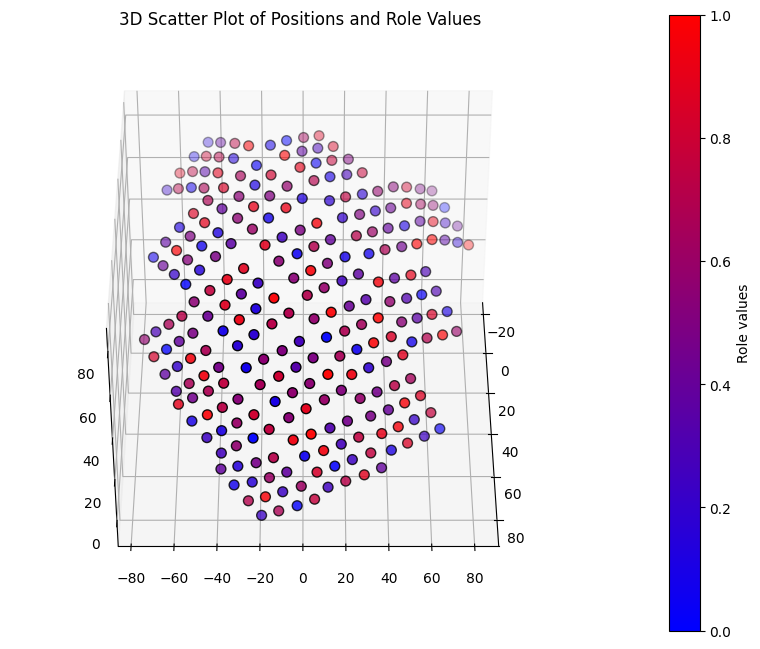

In [31]:


# Example numpy array of shape (256, 3)
data = left_handed_montage

# Example role values for each position
role_values = np.random.random(256)

# Normalize role_values for color mapping
normalized_role_values = (role_values - role_values.min()) / (role_values.max() - role_values.min())

# Create a custom colormap to map role values to colors
colors = [(0, 0, 1), (1, 0, 0)]  # Blue to Red
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom", colors)

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=normalized_role_values, cmap=custom_colormap, s=50, edgecolor='k')

# Set the viewing angle
elevation = 40  # degrees
azimuth = 0  # degrees
ax.view_init(elev=elevation, azim=azimuth)

# Hide coordinate system
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
# ax.xaxis.line.set_lw(0.)
# ax.yaxis.line.set_lw(0.)
# ax.zaxis.line.set_lw(0.)

# Add a colorbar to show the mapping of role values to colors
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Role values")

# Set the title
ax.set_title("3D Scatter Plot of Positions and Role Values")

plt.show()


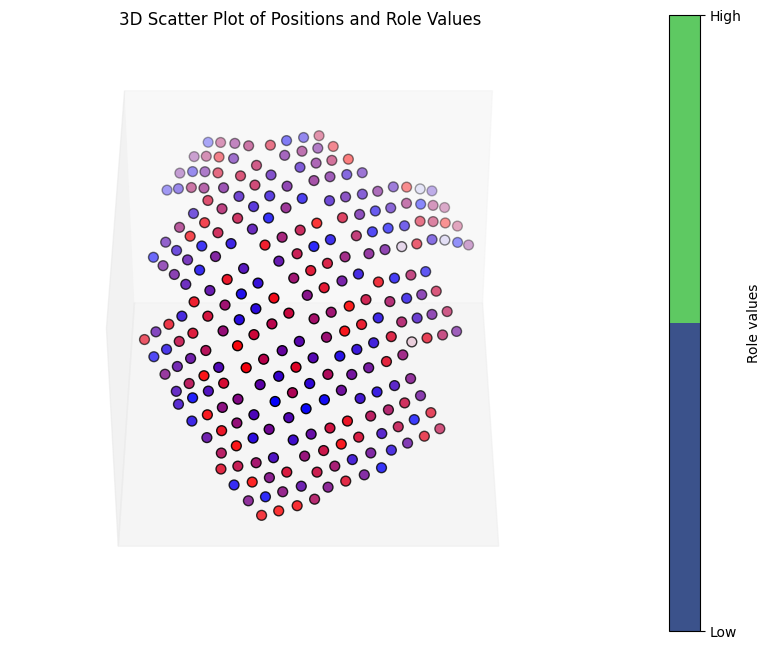

In [34]:
# Example role values for each position
role_values = np.random.random(256)

# Normalize role_values for color mapping
normalized_role_values = (role_values - role_values.min()) / (role_values.max() - role_values.min())

# Create a custom colormap to map role values to colors
colors = [(0, 0, 1), (1, 0, 0)]  # Blue to Red
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom", colors)

# Points to decrease opacity based on their indices in the data array
points_to_decrease_opacity = [5, 10, 25, 50]

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Determine the colors for each point
point_colors = custom_colormap(normalized_role_values)

# Set alpha value for specific points
opacity_decrease = 0.2
for index in points_to_decrease_opacity:
    point_colors[index, 3] = opacity_decrease

scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=point_colors, s=50, edgecolor='k')

# Set the viewing angle
elevation = 40  # degrees
azimuth = 0  # degrees
ax.view_init(elev=elevation, azim=azimuth)

# Hide coordinate system
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.line.set_lw(0.)
ax.yaxis.line.set_lw(0.)
ax.zaxis.line.set_lw(0.)

# Discrete colorbar with only red and blue
bounds = [0, 0.5, 1]
norm = mcolors.BoundaryNorm(bounds, custom_colormap.N)
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, cmap=custom_colormap, norm=norm, ticks=[0, 1], boundaries=bounds)
cbar.set_ticklabels(['Low', 'High'])
cbar.set_label("Role values")

# Set the title
ax.set_title("3D Scatter Plot of Positions and Role Values")

plt.show()
